# 데이터 적재

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # 데이터프레임 형태로 가져오기

# 데이터 탐색

In [2]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: xlabel='target', ylabel='count'>

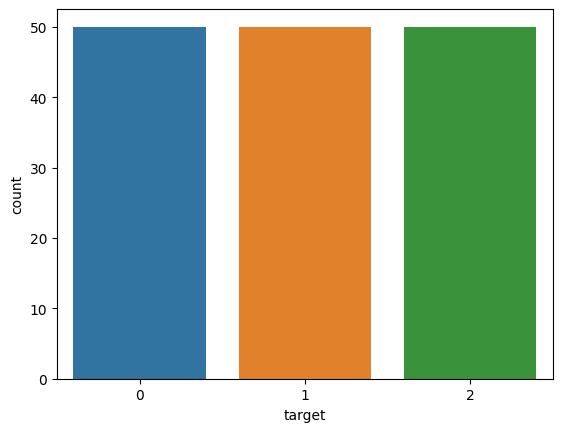

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(iris, x='target') # target 변수의 분포 확인

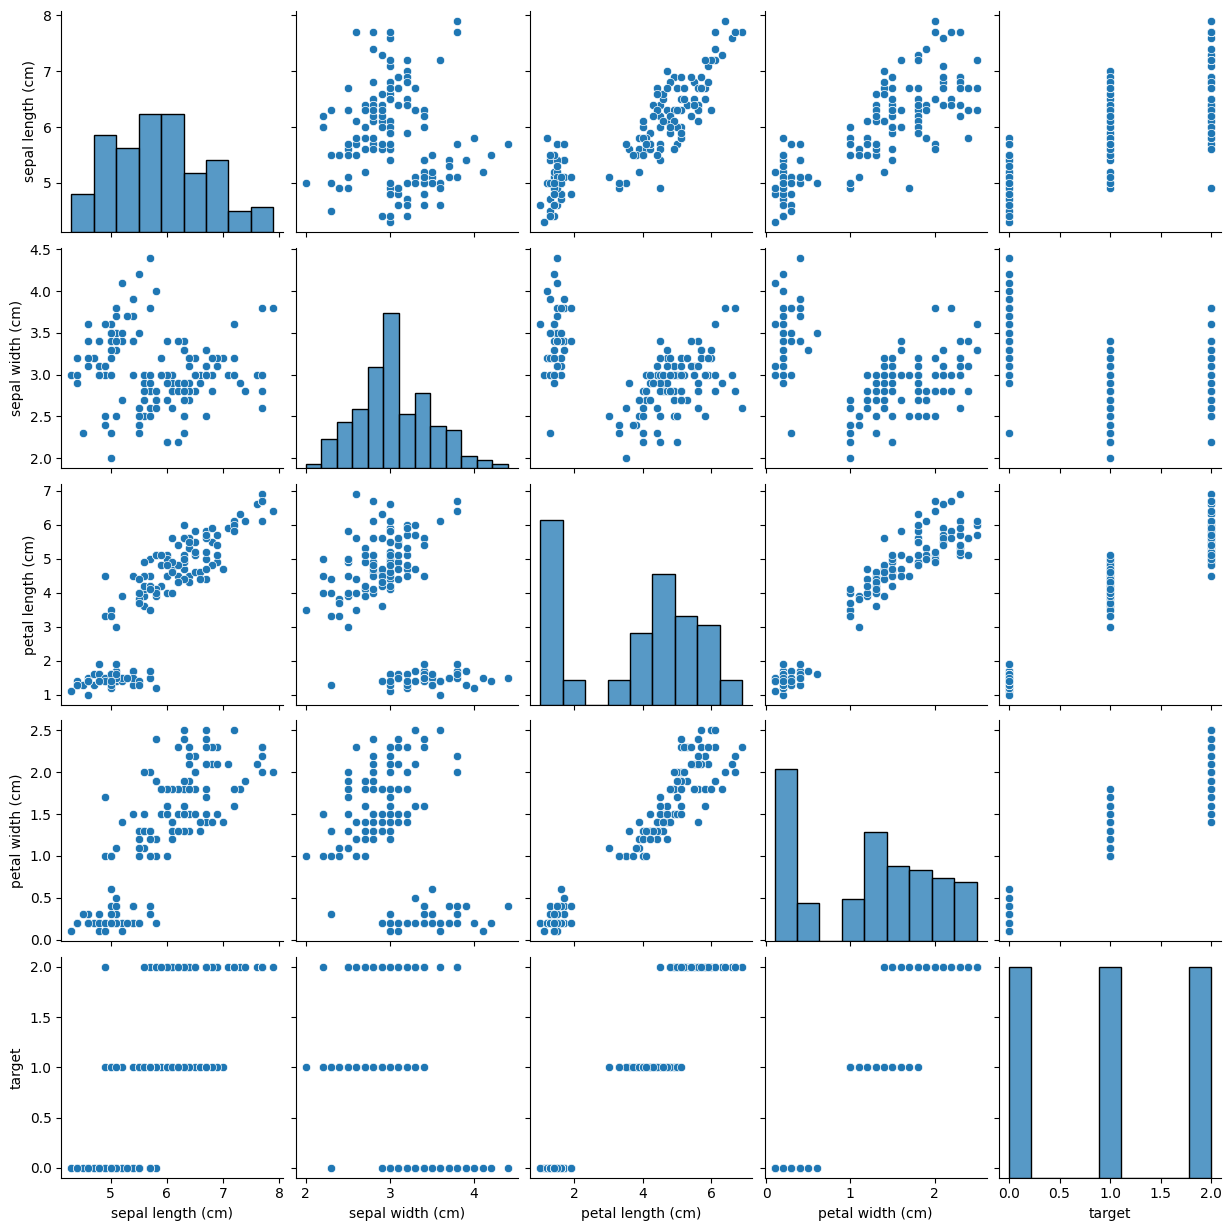

In [8]:
sns.pairplot(iris.frame) # 변수들 간 관계를 훑어보기 위한 시각화

# 비지도 학습 모델 학습

In [9]:
X = iris.data
y = iris.target

## K-means clustering

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

- 최적의 k(클러스터 개수) 찾기 위한 대표적 방법: elbow method

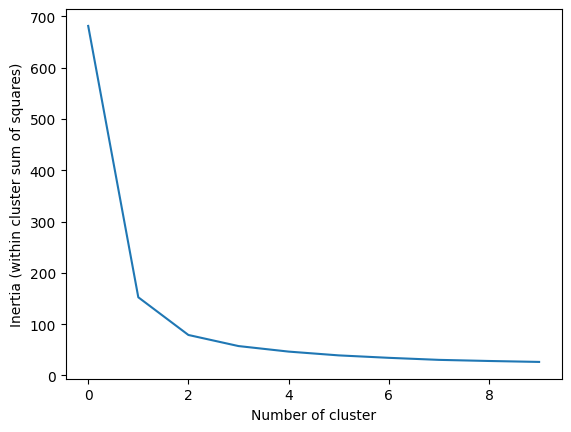

In [11]:
sns.lineplot(wcss)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia (within cluster sum of squares)')
plt.show()

- 시각화 및 군집 개수 분석 결과 군집 개수는 3으로 설정

In [12]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

results = dict()
results['K-means'] = y_pred

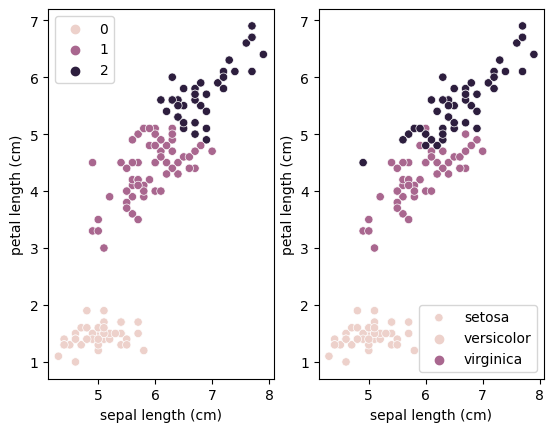

In [13]:
# 한 figure에 여러 plot 출력하기 위해 subplot 사용
plt.subplot(121) # 121은 열 개수 1개, 행 개수 2개인 프레임의 첫 번째 위치에 해당 plot을 위치시키겠다는 의미
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y_pred)

plt.subplot(122)
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y)
plt.legend(labels=iris.target_names)
plt.show()

- 실제값과 군집화 결과 비교

## DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X)

y_pred = dbscan.labels_
results['DBSCAN'] = y_pred

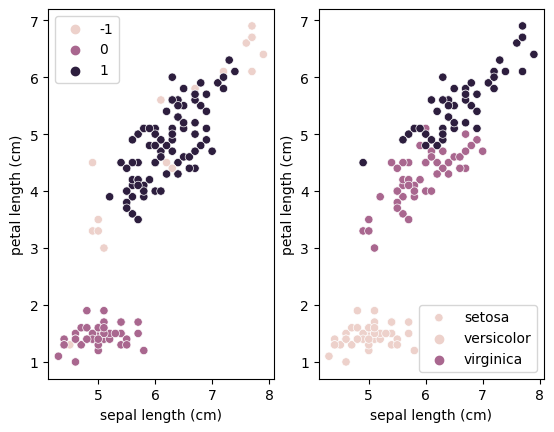

In [15]:
plt.subplot(121)
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y_pred)

plt.subplot(122)
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y)
plt.legend(labels=iris.target_names)
plt.show()

- DBSCAN은 분포 기반 군집화 방법으로, 한 군집으로 묶이지 못한 나머지들에 해당하는 -1 군집이 존재

## Hierarichal clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

y_pred = agg.labels_
results['Hierarichal'] = y_pred

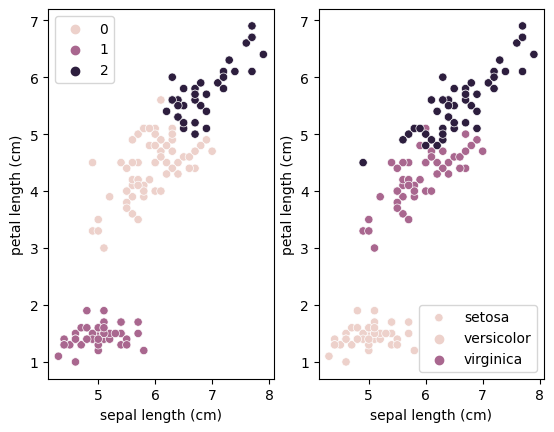

In [17]:
plt.subplot(121)
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y_pred)

plt.subplot(122)
sns.scatterplot(data=X, x='sepal length (cm)', y='petal length (cm)', hue=y)
plt.legend(labels=iris.target_names)
plt.show()

### Dendrogram 시각화
- Dendrogram은 계층적 군집화에서 표현 가능한 시각화 형태

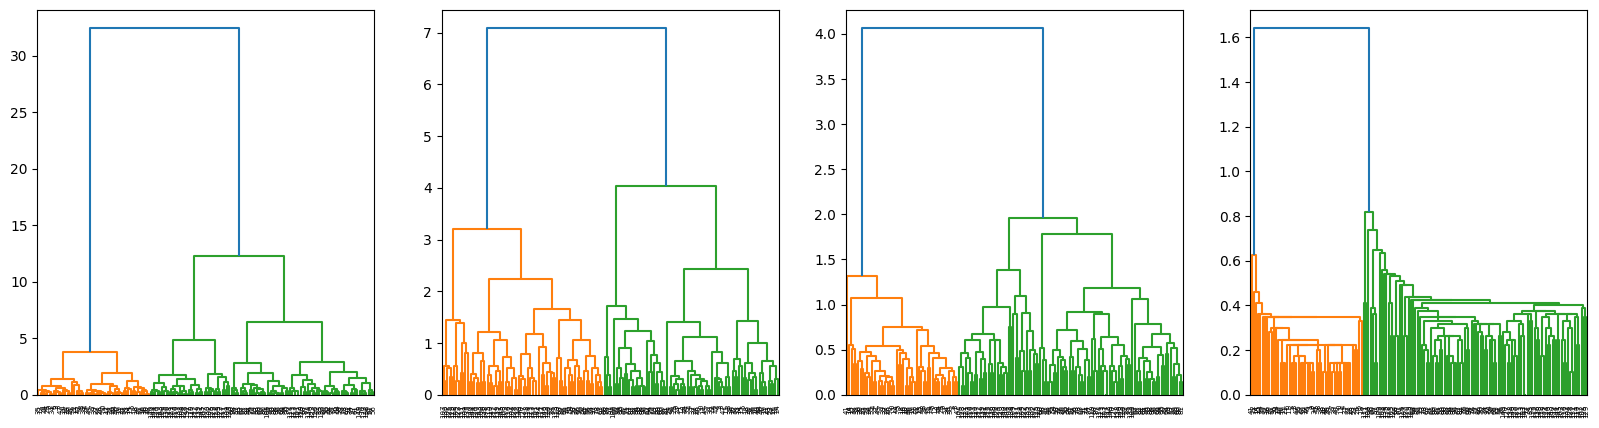

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

plt.figure(figsize=(20,5))

plt.subplot(141)
dend = dendrogram(linkage(X, 'ward'))

plt.subplot(142)
dend = dendrogram(linkage(X, 'complete'))

plt.subplot(143)
dend = dendrogram(linkage(X, 'average'))

plt.subplot(144)
dend = dendrogram(linkage(X, 'single'))

plt.show()

- 데이터 간의 거리를 계산하는 방식에 따라 ward, complete, average, single로 나뉨
- 몇 개의 그룹으로 나뉘는지 한눈에 볼 수 있음
- 군집 개수를 늘리거나 줄이려고 할 때 어떤 군집을 쪼개거나 병합시킬지 dendrogram 기반으로 판단할 수 있음

# 학습 결과 평가 및 시각화

In [20]:
results['True value'] = np.array(y)
results

{'K-means': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32),
 'DBSCAN': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
  

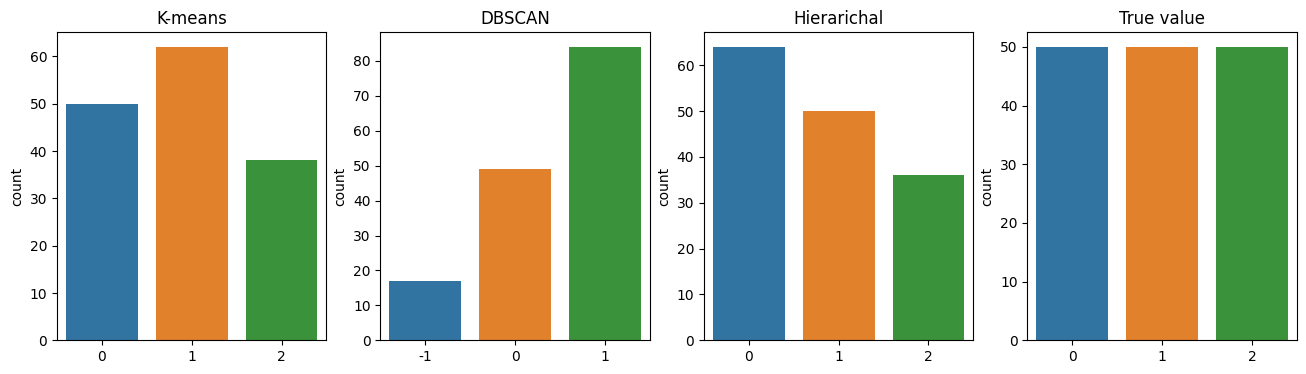

In [21]:
plt.figure(figsize=(16,4))
i = 0
for k,v in results.items():
  i += 1
  plt.subplot(1,4,i)
  sns.countplot(x=v)
  plt.title(k)

plt.show()

- 군집 분포를 시각화
- K-means와 Hierarchical clustering이 실제 값과 가장 유사한 분포를 가짐
- 앞서 확인한 scatter plot에서도 K-means와 Hierarchical clustering이 실제값과 가장 유사한 분류를 수행함